# how to match two arrays in the same range when some items are missing.


# Conclusion

Is really hard, what you need is to take them into the a framework where both can be compared in the same terms

In [7]:
import numpy as np
import matplotlib.pyplot as plt



In [8]:
pix = [4045.36048967,
       4359.00844052,
       5462.41340869,
       5770.66144699,
       5791.57704651,
       6096.55893492,
       6143.32561919,
       6266.45571642,
       6334.35505619,
       6382.89008408,
       6401.94974139,
       6506.18030416,
       6532.31524885,
       6598.42313947,
       6677.62676915,
       6716.42369475,
       6928.72829761,
       6964.55623294,
       7031.59001681,
       7066.31502977,
       7244.60582379,
       7272.13663124,
       7299.17806866,
       7383.44325464,
       7503.66739389,
       7514.4268209,
       7635.38143863,
       7724.73644683,
       7950.04007691]

ref = [4046.565,
       4358.335,
       5460.75,
       5769.61,
       5790.67,
       6096.1631,
       6143.0626,
       6266.495,
       6334.4278,
       6382.9917,
       6402.248,
       6506.5281,
       6598.9529,
       6678.2762,
       6717.043,
       6929.4673,
       6965.431,
       7032.4131,
       7067.218,
       7245.1666,
       7272.936,
       7383.98,
       7435.368,
       7503.869,
       7514.652,
       7635.106,
       7724.207,
       7948.176]

In [14]:
print(len(pix))
print(len(ref))

29
28


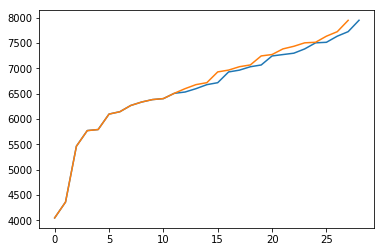

In [10]:
plt.plot(pix)
plt.plot(ref)
plt.show()

In [11]:
diff = [ref[i] - pix[i] for i in range(len(ref))]

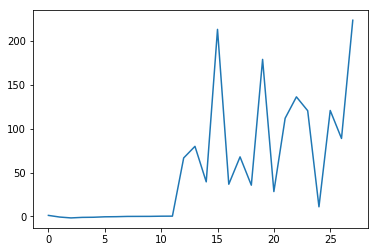

In [12]:
plt.plot(diff)
plt.show()

In [24]:
# print(ref, len(ref))
# print(pix, len(pix))
max_lag = abs(len(ref) - len(pix))
for i in range(np.min([len(ref), len(pix)])):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27


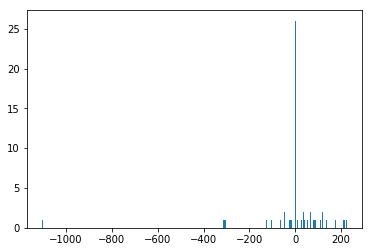

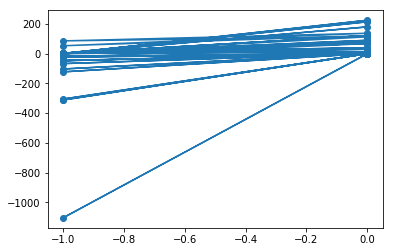

In [58]:
all_diff = []
index_diff = []
for r in range(len(ref)):
    # print(max_lag)
    for p in range(max_lag + 1):
        all_diff.append(ref[r] - pix[r + p])
        index_diff.append(r - (r + p))
res  = plt.hist(all_diff, bins=300)
plt.show()
 #print(res)
plt.plot(index_diff, all_diff, marker='o')
plt.show()

In [43]:
index = np.argmax(res[0])
print(index)
print(res[0][index])
max_diff = res[1][index]
print(res[1][index - 1], res[1][index], res[1][index + 1])

249
26.0
-6.66356021907 -2.2385003462 2.18655952667


In [54]:
lag = 0
for i in range(np.min([len(ref), len(pix)])):
    if abs(ref[i + lag] - pix[i]) <= abs(max_diff):
        print(ref[i + lag], pix[i], ref[i + lag] - pix[i])
        # print(i+ lag, i)
        print(lag)
    elif abs(ref[i + lag + 1] - pix[i]) <= abs(max_diff):
        lag += 1
        print("NOT ", ref[i + lag], pix[i] , ref[i + lag]-pix[i])
        print(lag)
    else:
        lag -= 1
        print("-NOT ", ref[i + lag], pix[i] , ref[i + lag]-pix[i])
        print(lag)

4046.565 4045.36048967 1.2045103300001756
0
4358.335 4359.00844052 -0.6734405199995308
0
5460.75 5462.41340869 -1.663408690000324
0
5769.61 5770.66144699 -1.0514469899999312
0
5790.67 5791.57704651 -0.9070465100003275
0
6096.1631 6096.55893492 -0.3958349200001976
0
6143.0626 6143.32561919 -0.26301918999979534
0
6266.495 6266.45571642 0.0392835800003013
0
6334.4278 6334.35505619 0.07274381000024732
0
6382.9917 6382.89008408 0.1016159199998583
0
6402.248 6401.94974139 0.29825860999972065
0
6506.5281 6506.18030416 0.3477958400007992
0
-NOT  6506.5281 6532.31524885 -25.78714884999954
-1
6598.9529 6598.42313947 0.5297605300002033
-1
6678.2762 6677.62676915 0.649430850000499
-1
6717.043 6716.42369475 0.6193052499993428
-1
6929.4673 6928.72829761 0.7390023900006781
-1
6965.431 6964.55623294 0.8747670599996127
-1
7032.4131 7031.59001681 0.8230831900000339
-1
7067.218 7066.31502977 0.9029702299994824
-1
7245.1666 7244.60582379 0.5607762099998581
-1
7272.936 7272.13663124 0.7993687600001067
-1
-